## Using Kaggle emotion data and manually labeled yelp data

Emotion data [here](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?select=val.txt)

Yelp data [here](https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset)

# Extract Data

In [1]:
#import packages
import pandas as pd
import numpy as np
import re

In [2]:
emotion_dict = {'surprise':0, 'love':1 , 'joy':2 , 'fear': 3, 'sadness': 4, 'anger':5}
p = dict(zip(emotion_dict.keys(), emotion_dict.values()))

### Train data

In [3]:
with open('train.txt', 'r') as f:
    line = f.readlines()
f.close()

In [4]:
for i, text in enumerate(line):
    line[i] = re.sub('\n', '', text)

In [5]:
line

['i didnt feel humiliated;sadness',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness',
 'im grabbing a minute to post i feel greedy wrong;anger',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love',
 'i am feeling grouchy;anger',
 'ive been feeling a little burdened lately wasnt sure why that was;sadness',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise',
 'i feel as confused about life as a teenager or as jaded as a year old man;fear',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy',
 'i feel romantic too;love',
 'i feel like i have to make the suffering i m seeing mean something;sadness',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy',
 'i think it s the eas

In [6]:
train = pd.DataFrame(line, columns=['text'])

In [7]:
train.head()

,text
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger


In [8]:
train= train['text'].str.split(';', expand = True)

In [9]:
train.rename(columns= {0:'text',1:'label'},inplace=True)
train['label_num'] = train['label'].apply(lambda x:p[x])

In [10]:
train.head()

,text,label,label_num
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,5
3,i am ever feeling nostalgic about the fireplac...,love,1
4,i am feeling grouchy,anger,5


### Test Data

In [11]:
with open('test.txt', 'r') as f:
    line = f.readlines()
f.close()

for i, text in enumerate(line):
    line[i] = re.sub('\n', '', text)

test = pd.DataFrame(line, columns=['text'])

test = test.text.str.split(';', expand = True)

test.rename(columns = {0:'text', 1:'label'}, inplace=True)
test['label_num'] = test['label'].apply(lambda x:p[x])
test.head()

,text,label,label_num
0,im feeling rather rotten so im not very ambiti...,sadness,4
1,im updating my blog because i feel shitty,sadness,4
2,i never make her separate from me because i do...,sadness,4
3,i left with my bouquet of red and yellow tulip...,joy,2
4,i was feeling a little vain when i did this one,sadness,4


### Validation Data

In [12]:
with open('val.txt', 'r') as f:
    line = f.readlines()
f.close()

for i, text in enumerate(line):
    line[i] = re.sub('\n', '', text)

val = pd.DataFrame(line, columns=['text'])

val = val.text.str.split(';', expand = True)

val.rename(columns = {0:'text', 1:'label'}, inplace=True)
val['label_num'] = val['label'].apply(lambda x:p[x])
val.head()

,text,label,label_num
0,im feeling quite sad and sorry for myself but ...,sadness,4
1,i feel like i am still looking at a blank canv...,sadness,4
2,i feel like a faithful servant,love,1
3,i am just feeling cranky and blue,anger,5
4,i can have for a treat or if i am feeling festive,joy,2


# Data Preprocess

In [13]:
import sklearn
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk

nlp = spacy.load("en_core_web_sm")
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(STOP_WORDS)

extend2 = ["ill", "don" , "t", "m", "feel", "make","know", "feeling","really","go","time","s","ve","think", "will","want","little","still","day","people","need","thing","one","bit","way","come","look","find","start"]

stopwords.extend(extend2)


In [14]:
#train data
for i, text in enumerate(train.text):
    TEMP = nlp(text)
    TEMP = " ".join(token.lemma_ for token in TEMP).lower()
    train.text[i] = " ".join(token for token in TEMP.split() if token not in stopwords)

#test data
for i, text in enumerate(test.text):
    TEMP = nlp(text)
    TEMP = " ".join(token.lemma_ for token in TEMP).lower()
    test.text[i] = " ".join(token for token in TEMP.split() if token not in stopwords)

#validation data
for i, text in enumerate(val.text):
    TEMP = nlp(text)
    TEMP = " ".join(token.lemma_ for token in TEMP).lower()
    val.text[i] = " ".join(token for token in TEMP.split() if token not in stopwords)


/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/2435106216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.text[i] = " ".join(token for token in TEMP.split() if token not in stopwords)
/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/2435106216.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.text[i] = " ".join(token for token in TEMP.split() if token not in stopwords)
/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/2435106216.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [15]:
label_df = train[['label','label_num']].drop_duplicates()

In [16]:
label_to_labelnum = dict(label_df.values)
labelnum_to_label = dict(label_df[['label_num','label']].values)

### EDA

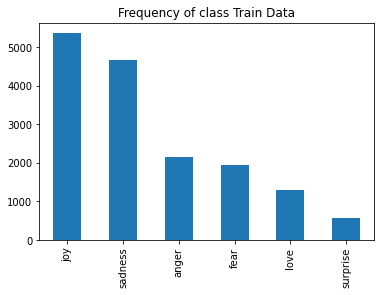

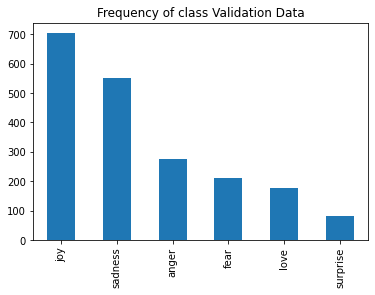

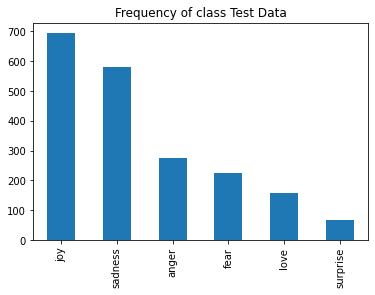

In [17]:
import matplotlib.pyplot as plt
all_data = {'Train Data': train, 'Validation Data': val, 'Test Data': test}

for i, data in all_data.items():
    data['label'].value_counts().plot(kind = 'bar')
    plt.title('Frequency of class {}'.format(i))
    plt.show()

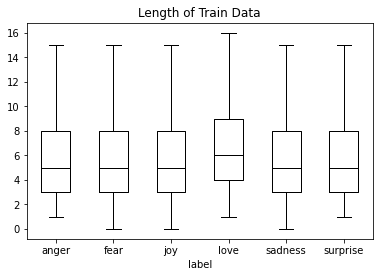

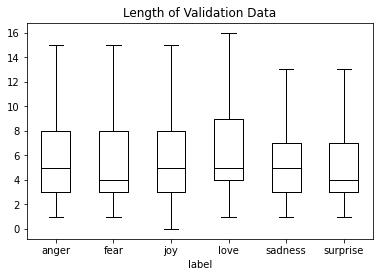

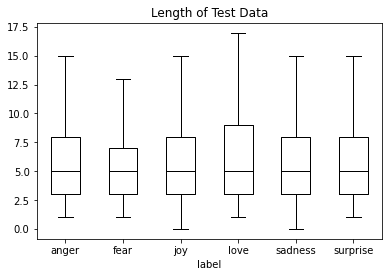

In [18]:
### word count for each sentence after data preprocessing

for i, df in all_data.items():
  df['Length'] = df['text'].str.split().apply(len)
  df.boxplot("Length", by="label", grid=False, showfliers=False, color="black")
  plt.title('Length of {}'.format(i))
  plt.suptitle("")
  plt.show()

## WordCloud

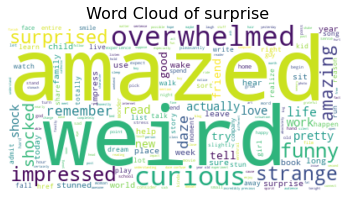

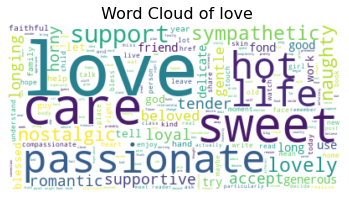

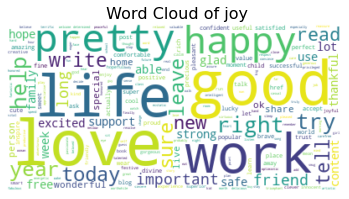

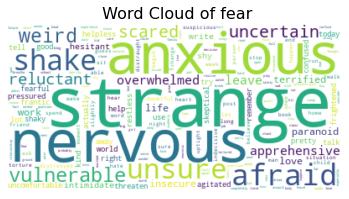

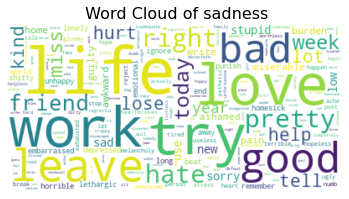

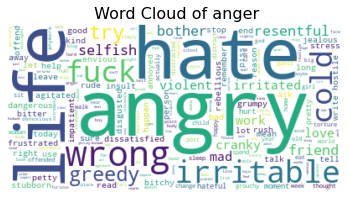

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for emotion in emotion_dict.keys():
    text = ' '.join([sentence for sentence in train.loc[train['label'] == emotion,'text']])

    # Create stopword list:
    #stopwords.update(["feel", "make","know", "m", 'feeling','really','go','time','s','ve','think', 'will','want','little','still','day',
    #'people','need','thing','one'])

    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.title(' Word Cloud of {}'.format(emotion), size = 16)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Word Importance

### Bag of Words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2

vectorizer = CountVectorizer(min_df=0.0001, ngram_range=(1,2))
feature_bow = vectorizer.fit_transform(train.text).toarray()
labels = train.label_num

print("Each of the %d complaints is represented by %d features (Bag of Words score of unigrams and bigrams)" %(feature_bow.shape))

Each of the 16000 complaints is represented by 10307 features (Bag of Words score of unigrams and bigrams)


In [21]:
N = 5

for label, label_num in sorted(label_to_labelnum.items()):
    feature_bow_chi2 = chi2(feature_bow, labels == label_num)
    indices = np.argsort(feature_bow_chi2[0])
    feature_name = np.array(vectorizer.get_feature_names_out())[indices]
    unigram = [v for v in feature_name if len(v.split(' ')) == 1]
    bigram = [v for v in feature_name if len(v.split(' ')) == 2]
    print("n==> %s:" %(label))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigram[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigram[-N:])))

n==> anger:
  * Most Correlated Unigrams are: angry, dangerous, resentful, greedy, irritable
  * Most Correlated Bigrams are: like rude, like selfish, like greedy, like heartless, like bother
n==> fear:
  * Most Correlated Unigrams are: unsure, uncertain, reluctant, apprehensive, vulnerable
  * Most Correlated Bigrams are: begin anxious, hesitant post, like paranoid, absolutely terrified, paranoid like
n==> joy:
  * Most Correlated Unigrams are: confident, glad, content, satisfied, successful
  * Most Correlated Bigrams are: cool cool, like worthwhile, like perfect, like important, like valuable
n==> love:
  * Most Correlated Unigrams are: naughty, loyal, nostalgic, horny, sympathetic
  * Most Correlated Bigrams are: like hot, fond memory, love love, like naughty, like care
n==> sadness:
  * Most Correlated Unigrams are: awkward, lethargic, punish, melancholy, miserable
  * Most Correlated Bigrams are: like worthless, target blank, like fake, like punish, like miss
n==> surprise:
  * M

### TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(min_df= 0.0001, ngram_range=(1,2), sublinear_tf=True)
feature_tfidf = tfidf.fit_transform(train.text).toarray()
labels = train.label_num

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(feature_tfidf.shape))

Each of the 16000 complaints is represented by 10307 features (TF-IDF score of unigrams and bigrams)


In [23]:
N = 5

for label, label_num in sorted(label_to_labelnum.items()):
    feature_tfidf_chi2 = chi2(feature_tfidf, labels == label_num)
    indices = np.argsort(feature_tfidf_chi2[0])
    feature_name = np.array(tfidf.get_feature_names_out())[indices]
    unigram = [v for v in feature_name if len(v.split(' ')) == 1]
    bigram = [v for v in feature_name if len(v.split(' ')) == 2]
    print("n==> %s:" %(label))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigram[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigram[-N:])))


n==> anger:
  * Most Correlated Unigrams are: irritated, resentful, cranky, irritable, greedy
  * Most Correlated Bigrams are: like stubborn, like greedy, like heartless, like selfish, like bother
n==> fear:
  * Most Correlated Unigrams are: uncertain, unsure, apprehensive, insecure, vulnerable
  * Most Correlated Bigrams are: hesitant post, nervous anxious, begin anxious, paranoid like, like paranoid
n==> joy:
  * Most Correlated Unigrams are: rich, brave, glad, successful, content
  * Most Correlated Bigrams are: self assure, like worthwhile, like perfect, like valuable, like important
n==> love:
  * Most Correlated Unigrams are: delicate, naughty, horny, nostalgic, sympathetic
  * Most Correlated Bigrams are: like hot, fond memory, love love, like naughty, like care
n==> sadness:
  * Most Correlated Unigrams are: homesick, awkward, miserable, punish, gloomy
  * Most Correlated Bigrams are: like doom, like worthless, like fake, like punish, like miss
n==> surprise:
  * Most Correlate

# Modeling

- Random Forest,
- Linear Support Vector Machine,
- Multinomial Naive Bayes,
- Logistic Regression

## Import the text directly to the models

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV

X_train = train.text
Y_train = train.label
X_test = test.text
Y_test = test.label
X_val = val.text
Y_val = val.label

In [25]:
def evaluate(preds, labels, print_details = True):
    f1 = f1_score(labels, preds, average='micro')
    if print_details:
        print("Precision", precision_score(labels, preds, average = None))
        print("Recall", recall_score(labels, preds, average = None))
        print("F1 score", f1_score(labels, preds, average = None))
    print("Avg. F1 score", f1)

def plot_confusion_matrix(preds, labels, class_size):
    cnf_mat = confusion_matrix(labels, preds)
    cnf_mat = cnf_mat.astype('float')/ cnf_mat.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cnf_mat, interpolation= 'nearest', cmap= plt.cm.Blues)
    plt.xticks(np.arange(class_size), np.arange(1, class_size +1))
    plt.yticks(np.arange(class_size), np.arange(1, class_size +1))
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.show()
    


cost_matrix = np.array([
    [50, -10, -10, -50, -50, -50], 
    [-10, 50, -10, -50, -50, -50],
    [-10, -10, 50, -50, -50, -50],
    [-100, -100, -100, 50, -10, -10],
    [-100, -100, -100, -10, 50, -10],
    [-100, -100, -100, -10, -10, 50]
])



def plot_profit(model, costbenefit_mat,y_preds, labels):
    '''
    Plot profit curve.

    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    '''

    # Profit curve data
    #profits = [] # one profit value for each T (threshold)
    # For each threshold, calculate profit - starting with largest threshold
    cnf_mat = confusion_matrix(labels, y_preds)
    cnf_mat = cnf_mat.astype('float')/ cnf_mat.sum(axis = 1)[:, np.newaxis]
    # Calculate total profit for this threshold
    profit = sum(sum(cnf_mat * costbenefit_mat))
    print(profit)

    # Profit curve plot
    #model_name = model.__class__.__name__
    #max_profit = max(profits)
    #plt.plot(np.linspace(0, 1, len(labels)), profits, label = '{}, max profit ${} per user'.format(model_name, max_profit))
    #plt.show()


In [26]:
cost_matrix = np.array([
    [50, -10, -10, -50, -50, -50], 
    [-10, 50, -10, -50, -50, -50],
    [-10, -10, 50, -50, -50, -50],
    [-100, -100, -100, 50, -10, -10],
    [-100, -100, -100, -10, 50, -10],
    [-100, -100, -100, -10, -10, 50]
])

In [83]:
cost_matrix

array([[  50,  -10,  -10,  -50,  -50,  -50],
       [ -10,   50,  -10,  -50,  -50,  -50],
       [ -10,  -10,   50,  -50,  -50,  -50],
       [-100, -100, -100,   50,  -10,  -10],
       [-100, -100, -100,  -10,   50,  -10],
       [-100, -100, -100,  -10,  -10,   50]])

In [27]:
def training(model, data, label, method = tfidf or vectorizer, print_details = True):
    x_tran = method.transform(data)
    model.fit(x_tran, label)
    train_preds = model.predict(x_tran)
    if print_details:
        dev_prob = model.predict_proba(x_tran)[:,1]
    evaluate(train_preds, label, print_details)

def testing(model, data, label ,class_size, method = tfidf or vectorizer ,print_details = True):
    x_tran = method.transform(data)
    test_preds = model.predict(x_tran)
    if print_details:
        test_probs = model.predict_proba(x_tran)
    #print(confusion_matrix(label,test_preds))
    evaluate(test_preds, label, print_details)
    plot_confusion_matrix(test_preds, label, class_size)
    plot_profit(model, cost_matrix, test_preds, label )



TRAINING


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Precision [0.95238095 0.95816327 0.98685759 0.85348226 0.98323036 0.86404834]
Recall [0.98193608 0.96954053 0.9382693  0.99616564 0.95499357 1.        ]
F1 score [0.96693273 0.96381832 0.96195029 0.91932059 0.96890628 0.92706645]
Avg. F1 score 0.95975
TESTING
[[0.02437873 0.02091796 0.03424402 0.01253943 0.90047799 0.00744187]
 [0.03815186 0.01886319 0.0468706  0.00658623 0.88140906 0.00811907]
 [0.01433952 0.01193241 0.02189837 0.00840992 0.93947051 0.00394926]
 ...
 [0.02072557 0.04756825 0.856661   0.02247515 0.04383732 0.00873271]
 [0.05114168 0.04796609 0.6729266  0.1129265  0.0923222  0.02271693]
 [0.02923816 0.45481223 0.04560027 0.06217857 0.03605246 0.37211831]]
Precision [0.85357143 0.85321101 0.92780338 0.67676768 0.91877256 0.5959596 ]
Recall [0.86909091 0.83035714 0.86906475 0.8427673  0.87607573 0.89393939]
F1 score [0.86126126 0.84162896 0.897474   0.75070028 0.8969163  0.71515152]
Avg. F1 score 0.8655
[[239   7   8   2  19   0]
 [  7 186   1   0   9  21]
 [  9   4 604  

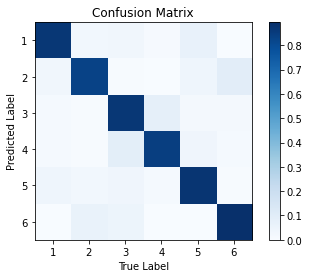

In [96]:
lr = LogisticRegression(solver = 'saga', penalty='l2', class_weight= 'balanced')

print("TRAINING")
training(lr, data = X_train, label = Y_train, method = vectorizer)

In [173]:
test_probs = lr.predict_proba(vectorizer.transform(X_test))

In [181]:
test_probs[:,1]

array([0.02091796, 0.01886319, 0.01193241, ..., 0.04756825, 0.04796609,
       0.45481223])

In [171]:
print("TESTING")
testing(lr, data = X_test, label = Y_test, method = vectorizer, class_size = 6)

TESTING
[[239   7   8   2  19   0]
 [  7 186   1   0   9  21]
 [  9   4 604  54  11  13]
 [  2   1  14 134   6   2]
 [ 23  16  21   8 509   4]
 [  0   4   3   0   0  59]]


In [28]:
models = [
    RandomForestClassifier(),
    CalibratedClassifierCV(LinearSVC()),
    MultinomialNB(),
    LogisticRegression(solver = 'saga', penalty='l2', class_weight= 'balanced')
]

### Modeling - Bag of Words

RandomForestClassifier
TRAINING
Precision [0.99490976 0.9953271  0.99757282 0.9923136  0.99530115 0.9825784 ]
Recall [0.9958314  0.98967475 0.99645655 0.99003067 0.9987141  0.98601399]
F1 score [0.99537037 0.99249288 0.99701437 0.99117083 0.99700471 0.98429319]
Avg. F1 score 0.9953125
TESTING
Precision [0.86861314 0.87677725 0.90204678 0.69135802 0.88415673 0.64634146]
Recall [0.86545455 0.82589286 0.88776978 0.70440252 0.89328744 0.8030303 ]
F1 score [0.86703097 0.85057471 0.89485134 0.69781931 0.88869863 0.71621622]
Avg. F1 score 0.8619999999999999


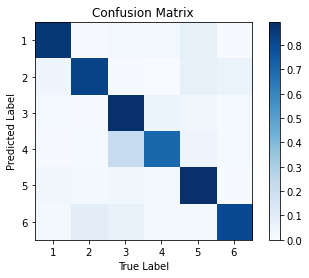

181.8530504908225
CalibratedClassifierCV
TRAINING
Precision [0.99297095 0.98399587 0.98470046 0.99136578 0.99122432 0.98566308]
Recall [0.9814729  0.98399587 0.99627005 0.96855828 0.99249893 0.96153846]
F1 score [0.98718845 0.98399587 0.99045147 0.97982933 0.99186121 0.97345133]
Avg. F1 score 0.9881875
TESTING
Precision [0.88014981 0.85779817 0.8746594  0.77372263 0.89690722 0.69354839]
Recall [0.85454545 0.83482143 0.92374101 0.66666667 0.89845095 0.65151515]
F1 score [0.86715867 0.84615385 0.89853044 0.71621622 0.89767842 0.671875  ]
Avg. F1 score 0.8675


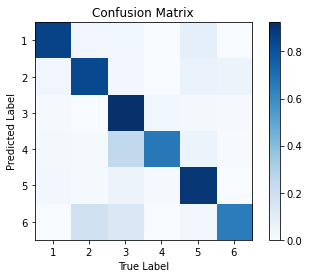

157.8452234813502
MultinomialNB
TRAINING
Precision [0.95704633 0.93326327 0.91413521 0.94068582 0.92673918 0.98148148]
Recall [0.91848078 0.91688178 0.97090638 0.77837423 0.96785255 0.6486014 ]
F1 score [0.93736705 0.925      0.94166591 0.85186739 0.94684977 0.78105263]
Avg. F1 score 0.9291875
TESTING
Precision [0.88461538 0.83769634 0.79877301 0.81318681 0.80305344 1.        ]
Recall [0.75272727 0.71428571 0.93669065 0.46540881 0.90533563 0.21212121]
F1 score [0.81335953 0.77108434 0.86225166 0.592      0.85113269 0.35      ]
Avg. F1 score 0.816


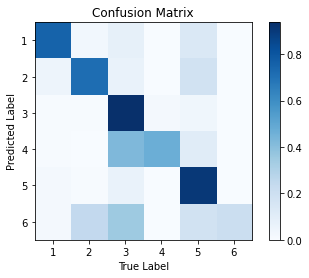

63.14852714799727
LogisticRegression
TRAINING


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Precision [0.95193172 0.95701126 0.98704867 0.8523622  0.98323036 0.85628743]
Recall [0.9814729  0.96541043 0.9380828  0.99616564 0.95499357 1.        ]
F1 score [0.96647662 0.9611925  0.96194301 0.91867044 0.96890628 0.92258065]
Avg. F1 score 0.959125
TESTING
Precision [0.85198556 0.85714286 0.92769231 0.67164179 0.91891892 0.6       ]
Recall [0.85818182 0.83035714 0.8676259  0.8490566  0.8777969  0.90909091]
F1 score [0.85507246 0.84353741 0.89665428 0.75       0.89788732 0.72289157]
Avg. F1 score 0.865


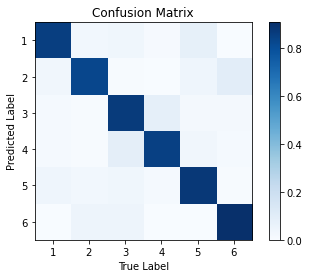

211.33332201879608


In [29]:
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    print("TRAINING")
    training(model, data = X_train, label = Y_train, method = vectorizer)
    print("TESTING")
    testing(model, data = X_test, label = Y_test, method = vectorizer, class_size = 6)

### Validation Check - Bag of Words

RandomForestClassifier
VALIDATING
Precision [0.8419244  0.84236453 0.91259259 0.77325581 0.8639576  0.74193548]
Recall [0.89090909 0.80660377 0.875      0.74719101 0.88909091 0.85185185]
F1 score [0.86572438 0.82409639 0.89340102 0.76       0.87634409 0.79310345]
Avg. F1 score 0.8615


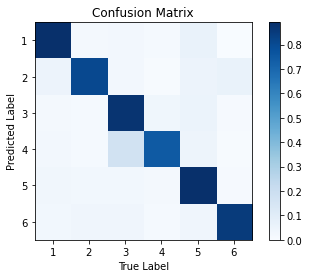

CalibratedClassifierCV
VALIDATING
Precision [0.8700361  0.86387435 0.89972527 0.85350318 0.88732394 0.78481013]
Recall [0.87636364 0.77830189 0.93039773 0.75280899 0.91636364 0.7654321 ]
F1 score [0.87318841 0.81885856 0.91480447 0.8        0.90161002 0.775     ]
Avg. F1 score 0.8805


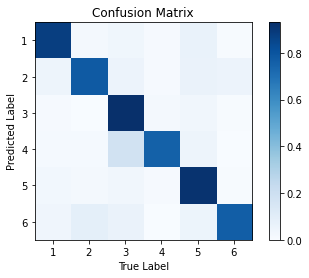

MultinomialNB
VALIDATING
Precision [0.88655462 0.82978723 0.81458591 0.85185185 0.8112     0.875     ]
Recall [0.76727273 0.73584906 0.93607955 0.51685393 0.92181818 0.34567901]
F1 score [0.82261209 0.78       0.87111699 0.64335664 0.86297872 0.49557522]
Avg. F1 score 0.8265


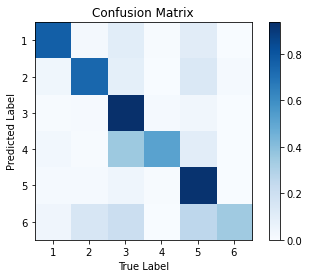

LogisticRegression
VALIDATING
Precision [0.86879433 0.82692308 0.92771084 0.75621891 0.91666667 0.7047619 ]
Recall [0.89090909 0.81132075 0.875      0.85393258 0.9        0.91358025]
F1 score [0.87971275 0.81904762 0.9005848  0.80211082 0.90825688 0.79569892]
Avg. F1 score 0.8769999999999999


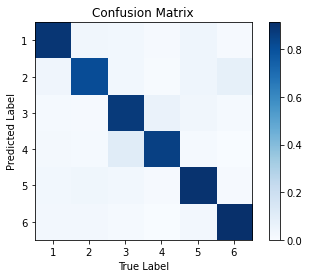

In [31]:
#Bag of Words
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    print("VALIDATING")
    testing(model, data = X_val, label = Y_val, method = vectorizer, class_size = 6)

### Modeling - TFIDF

RandomForestClassifier
TRAINING
Precision [0.99536823 0.99124163 0.99794623 0.99307692 0.99615138 0.98941799]
Recall [0.99536823 0.99328859 0.99682954 0.99003067 0.99849979 0.98076923]
F1 score [0.99536823 0.99226405 0.99738757 0.99155146 0.9973242  0.98507463]
Avg. F1 score 0.9955625
TESTING
Precision [0.88326848 0.85135135 0.8718663  0.75714286 0.87792642 0.63076923]
Recall [0.82545455 0.84375    0.90071942 0.66666667 0.90361446 0.62121212]
F1 score [0.85338346 0.84753363 0.88605803 0.7090301  0.89058524 0.6259542 ]
Avg. F1 score 0.857


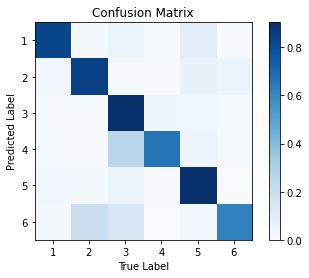

CalibratedClassifierCV
TRAINING
Precision [0.98418605 0.98087855 0.98403564 0.97354086 0.98674364 0.97526502]
Recall [0.98008337 0.97986577 0.98862365 0.95935583 0.98906987 0.96503497]
F1 score [0.98213042 0.9803719  0.98632431 0.96639629 0.98790538 0.97012302]
Avg. F1 score 0.9833125
TESTING
Precision [0.86861314 0.85388128 0.89204545 0.75483871 0.89303905 0.71186441]
Recall [0.86545455 0.83482143 0.90359712 0.73584906 0.90533563 0.63636364]
F1 score [0.86703097 0.84424379 0.89778413 0.74522293 0.8991453  0.672     ]
Avg. F1 score 0.869


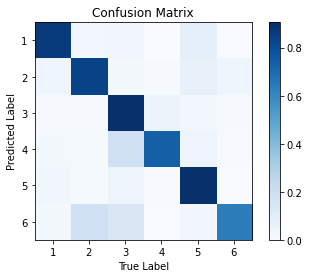

MultinomialNB
TRAINING
Precision [0.97206349 0.94038748 0.74090655 0.99226804 0.82198002 1.        ]
Recall [0.70912459 0.65152297 0.98769116 0.2952454  0.9697814  0.07342657]
F1 score [0.82003214 0.76974687 0.84668265 0.45508274 0.88978468 0.13680782]
Avg. F1 score 0.8150625000000001
TESTING
Precision [0.95588235 0.8974359  0.67964072 1.         0.73361227 1.        ]
Recall [0.47272727 0.46875    0.97985612 0.1572327  0.90533563 0.04545455]
F1 score [0.63260341 0.61583578 0.80259281 0.27173913 0.81047766 0.08695652]
Avg. F1 score 0.735


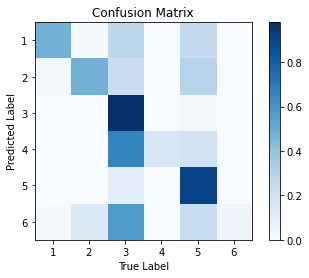

LogisticRegression
TRAINING


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Precision [0.9239611  0.91813159 0.98331977 0.77737665 0.97254108 0.7768595 ]
Recall [0.96804076 0.94372741 0.90152928 0.99079755 0.92606087 0.98601399]
F1 score [0.94548745 0.93075356 0.94064993 0.87120701 0.94873202 0.86902928]
Avg. F1 score 0.9330625
TESTING
Precision [0.84837545 0.83111111 0.94285714 0.63761468 0.91304348 0.59183673]
Recall [0.85454545 0.83482143 0.85467626 0.87421384 0.86746988 0.87878788]
F1 score [0.85144928 0.83296214 0.89660377 0.73740053 0.88967343 0.70731707]
Avg. F1 score 0.8585


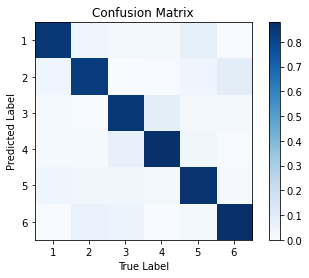

In [32]:
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    print("TRAINING")
    training(model, data = X_train, label = Y_train, method = tfidf)
    print("TESTING")
    testing(model, data = X_test, label = Y_test, method = tfidf, class_size = 6)

### Validation Check - TF-IDF

RandomForestClassifier
VALIDATING
Precision [0.85920578 0.85436893 0.8907563  0.84563758 0.86561955 0.81481481]
Recall [0.86545455 0.83018868 0.90340909 0.70786517 0.90181818 0.81481481]
F1 score [0.86231884 0.84210526 0.89703808 0.7706422  0.88334817 0.81481481]
Avg. F1 score 0.869


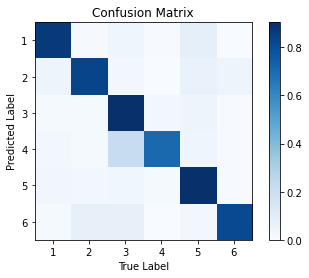

CalibratedClassifierCV
VALIDATING
Precision [0.88405797 0.86597938 0.90220386 0.87096774 0.88830716 0.78947368]
Recall [0.88727273 0.79245283 0.93039773 0.75842697 0.92545455 0.74074074]
F1 score [0.88566243 0.82758621 0.91608392 0.81081081 0.90650045 0.76433121]
Avg. F1 score 0.8855


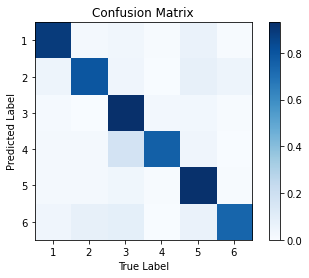

MultinomialNB
VALIDATING
Precision [0.95588235 0.91666667 0.67888999 1.         0.71388889 1.        ]
Recall [0.47272727 0.41509434 0.97301136 0.19101124 0.93454545 0.0617284 ]
F1 score [0.63260341 0.57142857 0.79976649 0.32075472 0.80944882 0.11627907]
Avg. F1 score 0.728


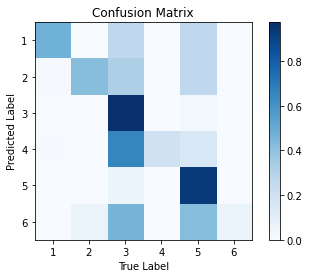

LogisticRegression
VALIDATING
Precision [0.8615917  0.80555556 0.93944099 0.73611111 0.92249527 0.69811321]
Recall [0.90545455 0.82075472 0.859375   0.89325843 0.88727273 0.91358025]
F1 score [0.88297872 0.81308411 0.89762611 0.8071066  0.90454124 0.79144385]
Avg. F1 score 0.8745


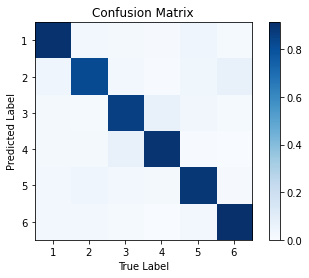

In [33]:
#TF-IDF
for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    print("VALIDATING")
    testing(model, data = X_val, label = Y_val, method = tfidf, class_size = 6)

## Yelp data

In [30]:
###

yelp  = pd.read_csv('/Users/sam/Desktop/UCI/Spring Quarter 2022/NLP/Yelp_labeled_150.csv')

In [31]:
yelp.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,emotion
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,4.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,0.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2.0


In [32]:
yelp_df = yelp[['text','emotion']]

In [33]:
yelp_df.dropna(inplace= True)

/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/1596352012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df.dropna(inplace= True)


In [34]:
yelp_df['emotion'] = yelp_df['emotion'].astype('int')

/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/3422944678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df['emotion'] = yelp_df['emotion'].astype('int')


### Data preprocessing

In [35]:
for i, text in enumerate(yelp_df.text):
    TEMP = nlp(text)
    TEMP = " ".join(token.lemma_ for token in TEMP if not token.is_punct ).lower()
    yelp_df.text[i] = " ".join(token for token in TEMP.split() if token not in stopwords)

/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/2522716518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df.text[i] = " ".join(token for token in TEMP.split() if token not in stopwords)
/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/2522716518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df.text[i] = " ".join(token for token in TEMP.split() if token not in stopwords)
/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/2522716518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [36]:
yelp_df.head()

,text,emotion
0,decide eat aware 2 hour begin end try multiple...,4
1,lot spin class year compare class body cycle n...,1
2,family diner buffet eclectic assortment large ...,2
3,wow yummy different delicious favorite lamb cu...,0
4,cute interior owner tour upcoming patio roofto...,2


In [37]:
yelp_df['emotion_label'] = yelp_df['emotion'].apply(lambda x:labelnum_to_label[x])

/var/folders/cz/wl4y4r_17tx5hz_l75w7k8sh0000gn/T/ipykernel_98316/174671918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df['emotion_label'] = yelp_df['emotion'].apply(lambda x:labelnum_to_label[x])


In [38]:
yelp_df.head()

,text,emotion,emotion_label
0,decide eat aware 2 hour begin end try multiple...,4,sadness
1,lot spin class year compare class body cycle n...,1,love
2,family diner buffet eclectic assortment large ...,2,joy
3,wow yummy different delicious favorite lamb cu...,0,surprise
4,cute interior owner tour upcoming patio roofto...,2,joy


<AxesSubplot:>

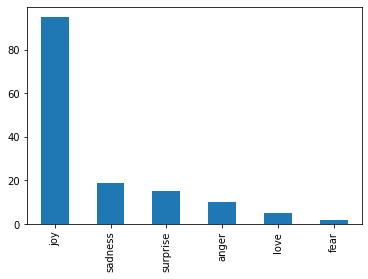

In [44]:
yelp_df.emotion_label.value_counts().plot(kind = 'bar')

In [39]:
models = [
    RandomForestClassifier(),
    CalibratedClassifierCV(LinearSVC()),
    MultinomialNB(),
    LogisticRegression(solver = 'saga', penalty='l2', class_weight= 'balanced')
]

Bag of Words
RandomForestClassifier
TRAINING
Precision [0.99444958 0.99481328 0.99683072 0.99613003 0.99551282 0.9825784 ]
Recall [0.9958314  0.99019102 0.99720254 0.98696319 0.99849979 0.98601399]
F1 score [0.99514001 0.99249677 0.9970166  0.99152542 0.99700407 0.98429319]
Avg. F1 score 0.9953125
TESTING
Precision [0.18181818 0.         0.75       0.06666667 0.22222222 0.125     ]
Recall [0.2        0.         0.72631579 0.2        0.21052632 0.06666667]
F1 score [0.19047619 0.         0.73796791 0.1        0.21621622 0.08695652]
Avg. F1 score 0.5273972602739726


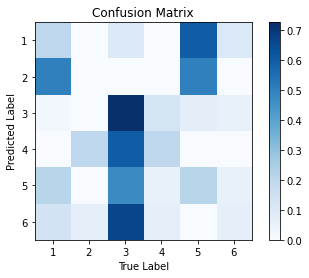

Bag of Words
CalibratedClassifierCV
TRAINING
Precision [0.99343647 0.98400413 0.98488479 0.99293009 0.9910122  0.98566308]
Recall [0.9814729  0.98451213 0.99645655 0.96932515 0.99249893 0.96153846]
F1 score [0.98741845 0.98425806 0.99063688 0.98098564 0.99175501 0.97345133]
Avg. F1 score 0.988375
TESTING
Precision [0.25       0.         0.70754717 0.25       0.21428571 0.        ]
Recall [0.2        0.         0.78947368 0.4        0.15789474 0.        ]
F1 score [0.22222222 0.         0.74626866 0.30769231 0.18181818 0.        ]
Avg. F1 score 0.5616438356164384


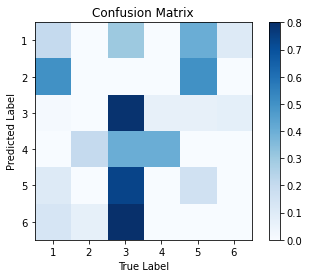

Bag of Words
MultinomialNB
TRAINING
Precision [0.95839381 0.93231899 0.91397472 0.94150418 0.92578926 0.98404255]
Recall [0.91755442 0.91739804 0.97090638 0.77760736 0.96785255 0.64685315]
F1 score [0.93752958 0.92479833 0.94158076 0.85174297 0.94635373 0.78059072]
Avg. F1 score 0.929
TESTING
Precision [0.         0.         0.67716535 0.33333333 0.         0.        ]
Recall [0.         0.         0.90526316 0.4        0.         0.        ]
F1 score [0.         0.         0.77477477 0.36363636 0.         0.        ]
Avg. F1 score 0.6027397260273972


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


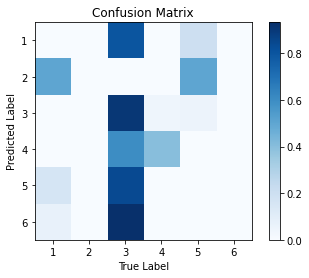

Bag of Words
LogisticRegression
TRAINING


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Precision [0.95159121 0.95852535 0.98646528 0.85180328 0.9838674  0.85628743]
Recall [0.98332561 0.96644295 0.93789631 0.99616564 0.95413631 1.        ]
F1 score [0.96719818 0.96246787 0.96156788 0.91834571 0.9687738  0.92258065]
Avg. F1 score 0.9591875
TESTING
Precision [0.11111111 0.         0.7        0.22222222 0.125      0.        ]
Recall [0.1        0.         0.73684211 0.4        0.10526316 0.        ]
F1 score [0.10526316 0.         0.71794872 0.28571429 0.11428571 0.        ]
Avg. F1 score 0.5136986301369864


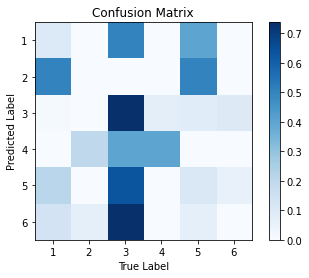

In [353]:
for model in models:
    print("Bag of Words")
    model_name = model.__class__.__name__
    print(model_name)
    print("TRAINING")
    training(model, data = X_train, label = Y_train, method = vectorizer)
    print("TESTING")
    testing(model, data = yelp_df.text, label = yelp_df.emotion_label , method = vectorizer, class_size = 6)

TF-IDF
RandomForestClassifier
TRAINING
Precision [0.99536823 0.9927686  0.99738757 0.99383667 0.99530115 0.98939929]
Recall [0.99536823 0.99225607 0.99682954 0.9892638  0.9987141  0.97902098]
F1 score [0.99536823 0.99251226 0.99710848 0.99154497 0.99700471 0.98418278]
Avg. F1 score 0.995375
TESTING
Precision [0.         0.         0.67521368 0.2        0.         0.2       ]
Recall [0.         0.         0.83157895 0.2        0.         0.06666667]
F1 score [0.         0.         0.74528302 0.2        0.         0.1       ]
Avg. F1 score 0.5547945205479452


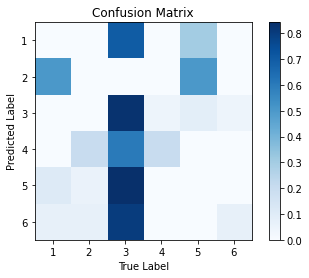

-278.8421052631579
TF-IDF
CalibratedClassifierCV
TRAINING
Precision [0.9837285  0.97983454 0.98384401 0.97429907 0.98568682 0.97345133]
Recall [0.98008337 0.97831699 0.98806416 0.95935583 0.98885555 0.96153846]
F1 score [0.98190255 0.97907517 0.98594957 0.96676971 0.98726864 0.96745822]
Avg. F1 score 0.98275
TESTING
Precision [0.2        0.         0.69565217 0.28571429 0.21428571 0.        ]
Recall [0.1        0.         0.84210526 0.4        0.15789474 0.        ]
F1 score [0.13333333 0.         0.76190476 0.33333333 0.18181818 0.        ]
Avg. F1 score 0.589041095890411


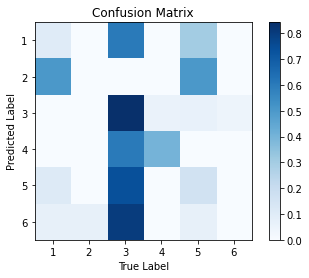

-222.1052631578947
TF-IDF
MultinomialNB
TRAINING
Precision [0.97348485 0.9394387  0.74326221 0.99002494 0.82380779 1.        ]
Recall [0.71421955 0.6566856  0.98750466 0.30444785 0.96999571 0.07517483]
F1 score [0.82393802 0.77301732 0.84814993 0.46568915 0.89094488 0.1398374 ]
Avg. F1 score 0.8171874999999998
TESTING
Precision [0.         0.         0.66911765 0.         0.         0.        ]
Recall [0.         0.         0.95789474 0.         0.         0.        ]
F1 score [0.         0.         0.78787879 0.         0.         0.        ]
Avg. F1 score 0.6232876712328768


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


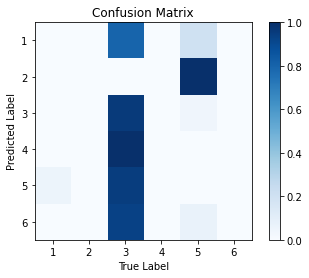

-316.2105263157895
TF-IDF
LogisticRegression
TRAINING


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Precision [0.93447038 0.92672859 0.98094852 0.77384523 0.97349506 0.72855314]
Recall [0.96433534 0.92720702 0.90264827 0.9892638  0.92884698 0.99475524]
F1 score [0.949168   0.92696774 0.94017094 0.86839448 0.95064707 0.84109387]
Avg. F1 score 0.9319375
TESTING
Precision [0.         0.         0.67889908 0.15384615 0.14285714 0.1       ]
Recall [0.         0.         0.77894737 0.4        0.05263158 0.06666667]
F1 score [0.         0.         0.7254902  0.22222222 0.07692308 0.08      ]
Avg. F1 score 0.5342465753424658


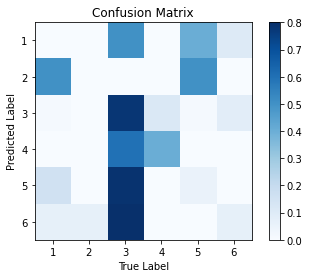

-253.78947368421052


In [365]:
for model in models:
    print("TF-IDF")
    model_name = model.__class__.__name__
    print(model_name)
    print("TRAINING")
    training(model, data = X_train, label = Y_train, method = tfidf)
    print("TESTING")
    testing(model, data = yelp_df.text, label = yelp_df.emotion_label , method = tfidf, class_size = 6)